In [1]:
using Distributions
using StatsPlots
default(fmt=:png,
    titlefontsize=8, tickfontsize=6, guidefontsize=7, legendfontsize=7,
    plot_titlefontsize=8,
    size=(400, 250))

# 離散分布のグラフを書くための設定
mypdf(dist, x) = pdf(dist, x)
mypdf(dist::DiscreteUnivariateDistribution, x) = pdf(dist, round(Int, x))

# 分布名から {～} を削除する
distname(dist) = replace(string(dist), r"{[^}]*}"=>"")

# 尖度
mykurtosis(dist) = kurtosis(dist)

mykurtosis (generic function with 1 method)

In [2]:
Normal()

Normal{Float64}(μ=0.0, σ=1.0)

In [3]:
distname(Normal())

"Normal(μ=0.0, σ=1.0)"

In [4]:
# 分布の設定
dist = Gamma(2, 3)

Gamma{Float64}(α=2.0, θ=3.0)

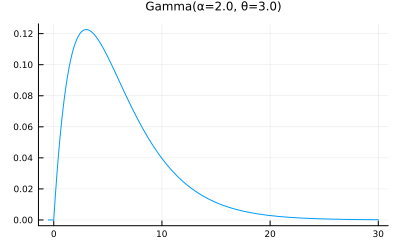

In [5]:
# 分布のプロット
xlim = (-0.5, 30)
plot(x -> pdf(dist, x), xlim...; label="", title=distname(dist))

In [6]:
# 分布のサンプルを大量に生成
n = 100
L = 10^5
samples = [rand(dist, n) for _ in 1:L]
first(samples, 3)

3-element Vector{Vector{Float64}}:
 [4.063916979712942, 2.1318459878302845, 3.463703830599508, 4.15718067421115, 9.240197012312702, 3.3294023308717904, 14.370441473623865, 3.4359104626980375, 3.806516928753303, 9.870344967652382  …  3.478571702202065, 5.2064719540439235, 5.878209237539858, 10.48401126781001, 5.273360604942393, 2.819558474803387, 14.056563760994178, 9.457297680354602, 3.8387667212215715, 6.608125777781714]
 [3.9964880154078135, 11.293402325983985, 4.352945769130482, 3.81435002007686, 2.2256266329492473, 6.619592522846224, 0.637543725883909, 9.23963153598412, 2.6505265961715123, 6.24360933684652  …  0.944645917402333, 1.1003986236543781, 8.836506901831157, 6.537674936077499, 4.166111361497875, 3.4309610078785937, 7.56821720966686, 1.0679140062436991, 1.0292747665612465, 8.263238856296969]
 [10.442413914998562, 0.18163239712397866, 7.208901881873139, 14.761999169563202, 9.670355211267225, 6.856322638704222, 7.764101073371242, 2.7176829984419273, 2.5814415298777034, 3.0851

(dist, n) = (Gamma(α=2.0, θ=3.0), 100)


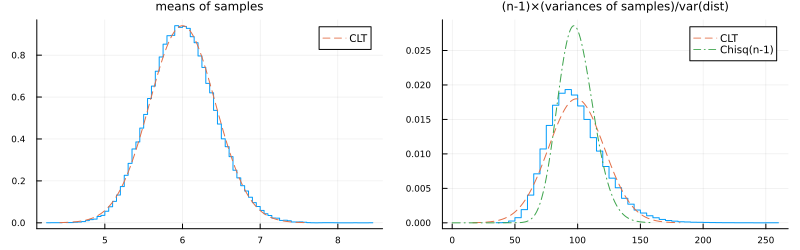

In [7]:
# サンプル達の標本平均と不偏分散を計算してヒストグラムをプロット
means_of_samples = mean.(samples)
variances_of_samples = var.(samples)

println("(dist, n) = (", distname(dist), ", ", n, ")")

bin = 100

P1 = stephist(means_of_samples; norm=true, bin, label="")
title!("means of samples")
plot!(Normal(mean(dist), std(dist)/√n); label="CLT", ls=:dash)

P2 = stephist((n-1)*variances_of_samples/var(dist); norm=true, bin, label="")
title!("(n-1)×(variances of samples)/var(dist)")
ku = kurtosis(dist)
plot!(Normal(n-1, (n-1)*√(ku/n + 2/(n-1))); label="CLT", ls=:dash)
plot!(Chisq(n-1); label="Chisq(n-1)", ls=:dashdot)

plot(P1, P2; size=(800, 250))

$X_1,X_2,\ldots,X_n$ は分布 $D$ のi.i.d.であるとし,

$$
\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i, \quad
S^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i - \bar{X})^2
$$

とおく. このとき, 中心極限定理より, $n$ を十分に大きくすると,

* $\bar{X}$ の分布は近似的に $\operatorname{Normal}(\mu, \sigma/\sqrt{n})$ になる.
* $(n-1)S^2/\sigma^2$ の分布は近似的に $\operatorname{Normal}\left(n-1, (n-1)\sqrt{\bar{\kappa}_4/n + 2/(n-1)}\,\right)$ になる.

ただし, ここで $\mu$ と $\sigma^2$ は分布 $D$ の期待値と分散であり, $\bar{\kappa}_4$ は分布 $D$ の(過剰)尖度である.

さらにもしも $D$ が正規分布ならば,

* $\bar{X}$ の分布はぴったり $\operatorname{Normal}(\mu, \sigma/\sqrt{n})$ になる.
* $(n-1)S^2/\sigma^2$ の分布はぴったり $\operatorname{Chisq}(n-1)$ になる.

正規分布に関する後者の結果は分散の値に関する検定や信頼区間で使われる.

分布 $\operatorname{Chisq}(n-1)$ の期待値は $n-1$ であり, 分布 $\operatorname{Normal}\left(n-1, (n-1)\sqrt{\bar{\kappa}_4/n + 2/(n-1)}\,\right)$ の期待値 $n-1$ に一致する.

しかし, 分布 $\operatorname{Chisq}(n-1)$ の分散は $2\sqrt{n-1}$ であり, 分布 $\operatorname{Normal}\left(n-1, (n-1)\sqrt{\bar{\kappa}_4/n + 2/(n-1)}\,\right)$ の分散 $\bar{\kappa}_4(n-1)/n + 2(n-1)$ との差は $n$ が大きなときほぼ分布 $D$ の過剰尖度 $\bar{\kappa}_4$ に等しくなる.

ゆえに, $(n-1)S^2/\sigma^2$ の分布はぴったり $\operatorname{Chisq}(n-1)$ になることを使う分散に関する検定や信頼区間は, たとえどんなに $n$ を大きくしても, 分布 $D$ の過剰尖度 $\bar{\kappa}_4$ の分だけ不正確になる.

それとは対照的に, $\bar{X}$ の分布はぴったり $\operatorname{Normal}(\mu, \sigma/\sqrt{n})$ になることを使う平均に関する検定や信頼区間は $n$ を十分に大きくすると中心極限定理によって誤差が小さくなってくれる.

このように, 正規分布モデルを使った検定や信頼区間であっても, 平均を扱う場合と分散を扱う場合では頑健さが大違いになる.

In [8]:
# 以上を函数化

function plot_means_and_vars(dist, n, L=10^5; bin=100, vbin=bin, vlim=nothing)
    samples = [rand(dist, n) for _ in 1:L]
    
    means_of_samples = mean.(samples)
    variances_of_samples = var.(samples)

    P1 = stephist(means_of_samples; norm=true, bin, label="")
    title!("means of samples")
    plot!(Normal(mean(dist), std(dist)/√n); label="CLT", ls=:dash)

    P2 = plot()
    if isnothing(vlim)
        stephist!((n-1)*variances_of_samples/var(dist); norm=true, bin=vbin, label="")
    else
        stephist!((n-1)*variances_of_samples/var(dist); norm=true, bin=vbin, label="", xlim=vlim)
    end
    title!("(n-1)×(variances of samples)/var(dist)")
    ku = kurtosis(dist)
    plot!(Normal(n-1, (n-1)*√(ku/n + 2/(n-1))); label="CLT", ls=:dash)
    plot!(Chisq(n-1); label="Chisq(n-1)", ls=:dashdot)
    
    plot(P1, P2; size=(800, 250))
    plot!(plot_title="$(distname(dist)), n=$n, kurtosis=$(round(ku; digits=3))")
end

plot_means_and_vars (generic function with 2 methods)

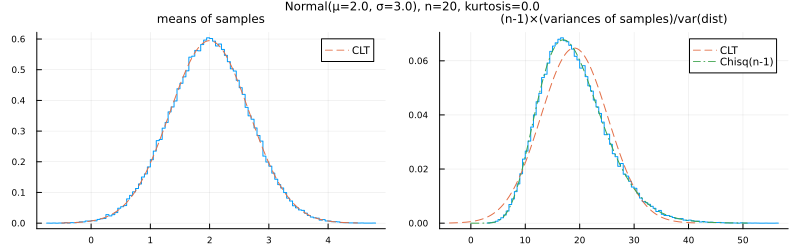

In [9]:
plot_means_and_vars(Normal(2, 3), 20)

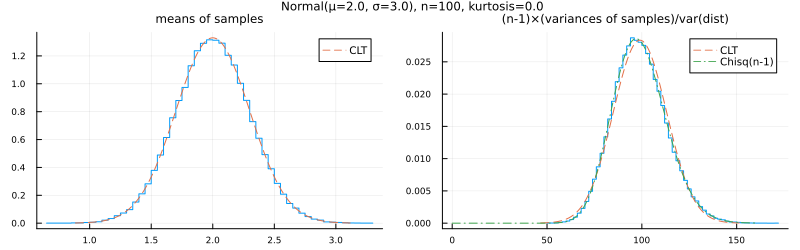

In [10]:
plot_means_and_vars(Normal(2, 3), 100)

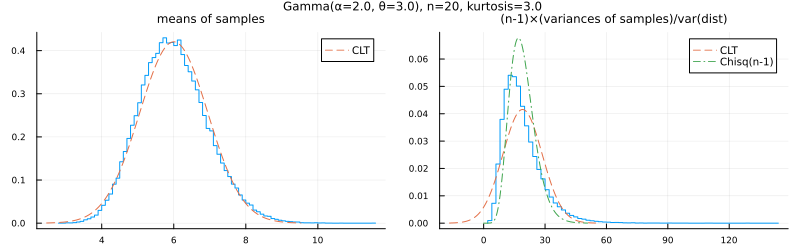

In [11]:
plot_means_and_vars(Gamma(2, 3), 20)

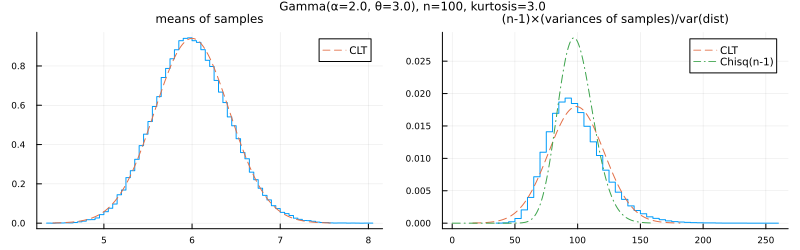

In [12]:
plot_means_and_vars(Gamma(2, 3), 100)

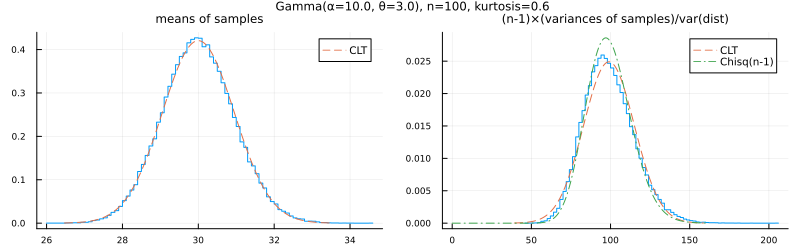

In [13]:
plot_means_and_vars(Gamma(10, 3), 100)

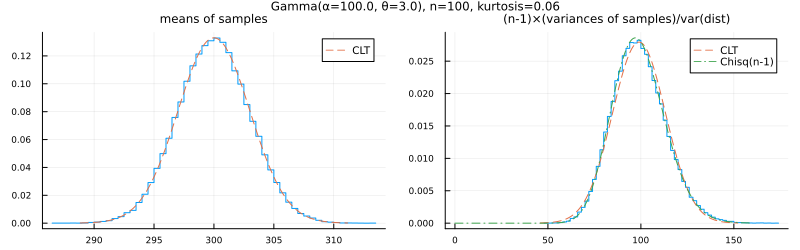

In [14]:
plot_means_and_vars(Gamma(100, 3), 100)

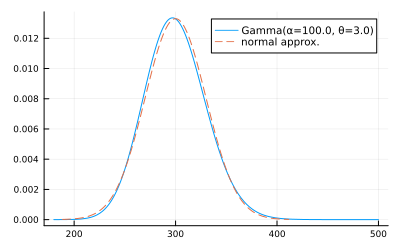

In [15]:
plot(Gamma(100, 3), 180, 500; label=distname(Gamma(100, 3)))
plot!(Normal(mean(Gamma(100, 3)), std(Gamma(100, 3))); label="normal approx.", ls=:dash)
#plot!(legend=:topleft)

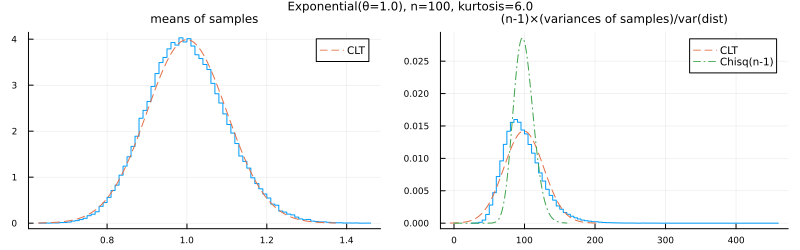

In [16]:
plot_means_and_vars(Exponential(), 100)

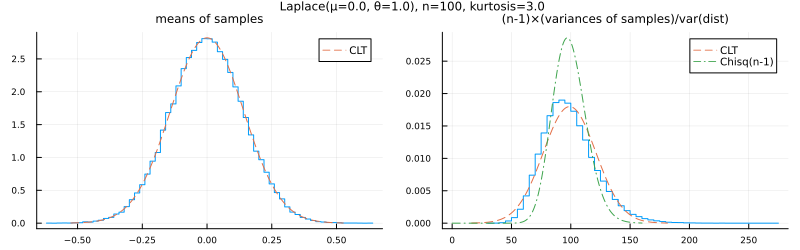

In [17]:
plot_means_and_vars(Laplace(), 100)

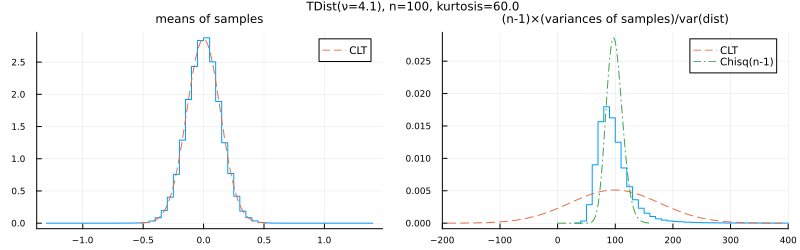

In [18]:
plot_means_and_vars(TDist(4.1), 100; vbin=1000, vlim=(-200, 400))

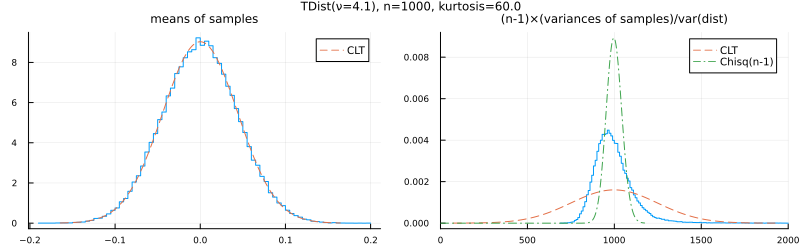

In [19]:
plot_means_and_vars(TDist(4.1), 1000; vbin=1000, vlim=(0, 2000))

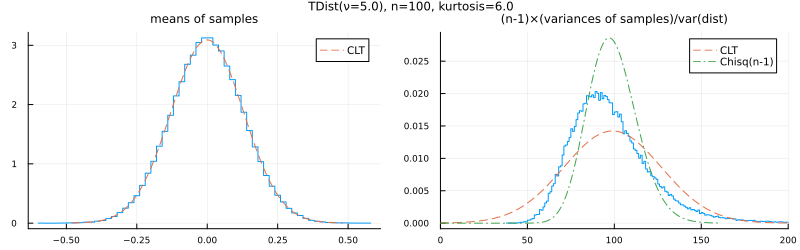

In [20]:
plot_means_and_vars(TDist(5), 100; vlim=(0, 200), vbin=1000)

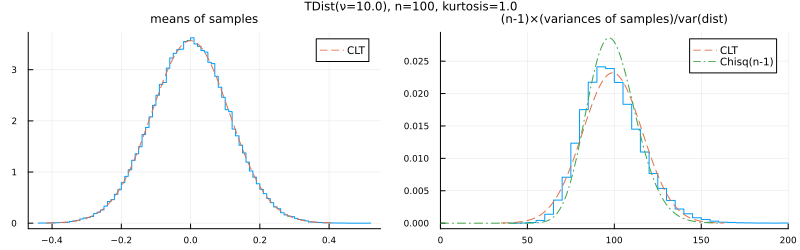

In [21]:
plot_means_and_vars(TDist(10), 100; vlim=(0, 200), vbin=100)

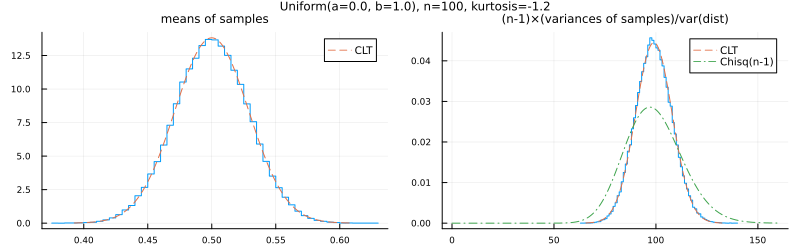

In [22]:
plot_means_and_vars(Uniform(), 100)

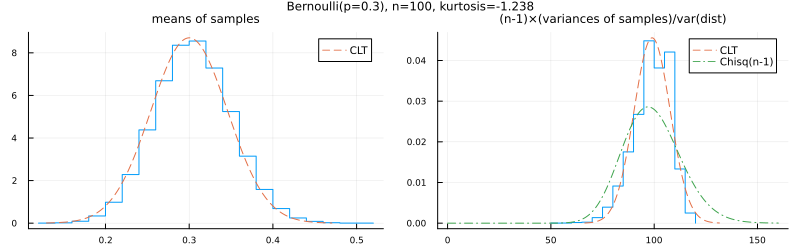

In [23]:
plot_means_and_vars(Bernoulli(0.3), 100; bin=20)

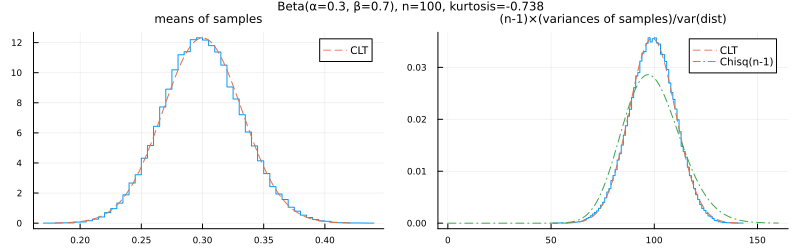

In [24]:
plot_means_and_vars(Beta(0.3, 0.7), 100)

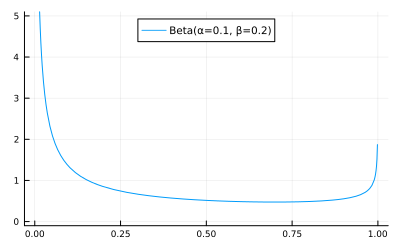

In [25]:
plot(Beta(0.3, 0.7); ylim=(-0.1, 5.1), label=distname(Beta(0.1, 0.2)))
plot!(legend=:top)